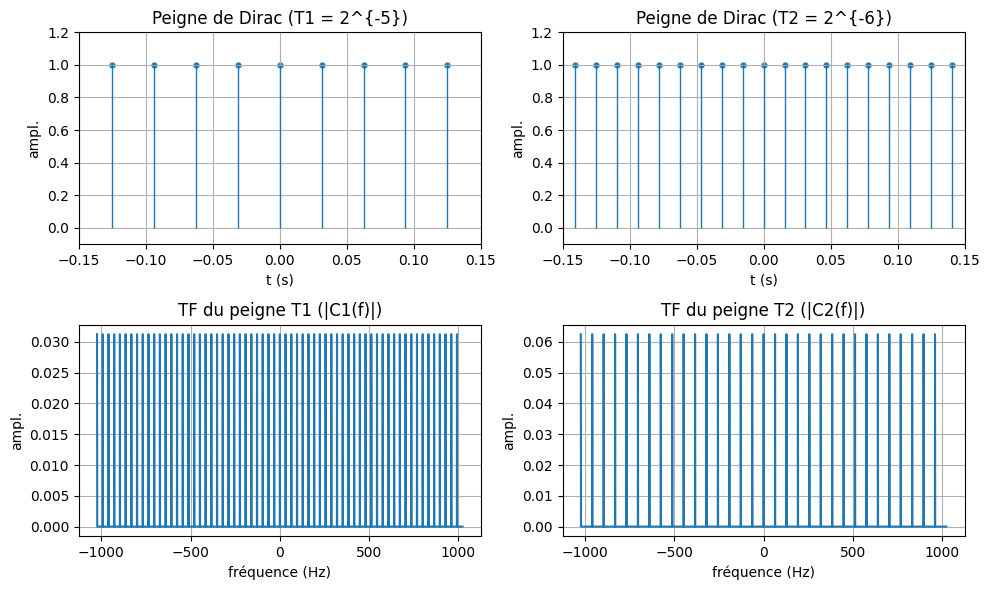

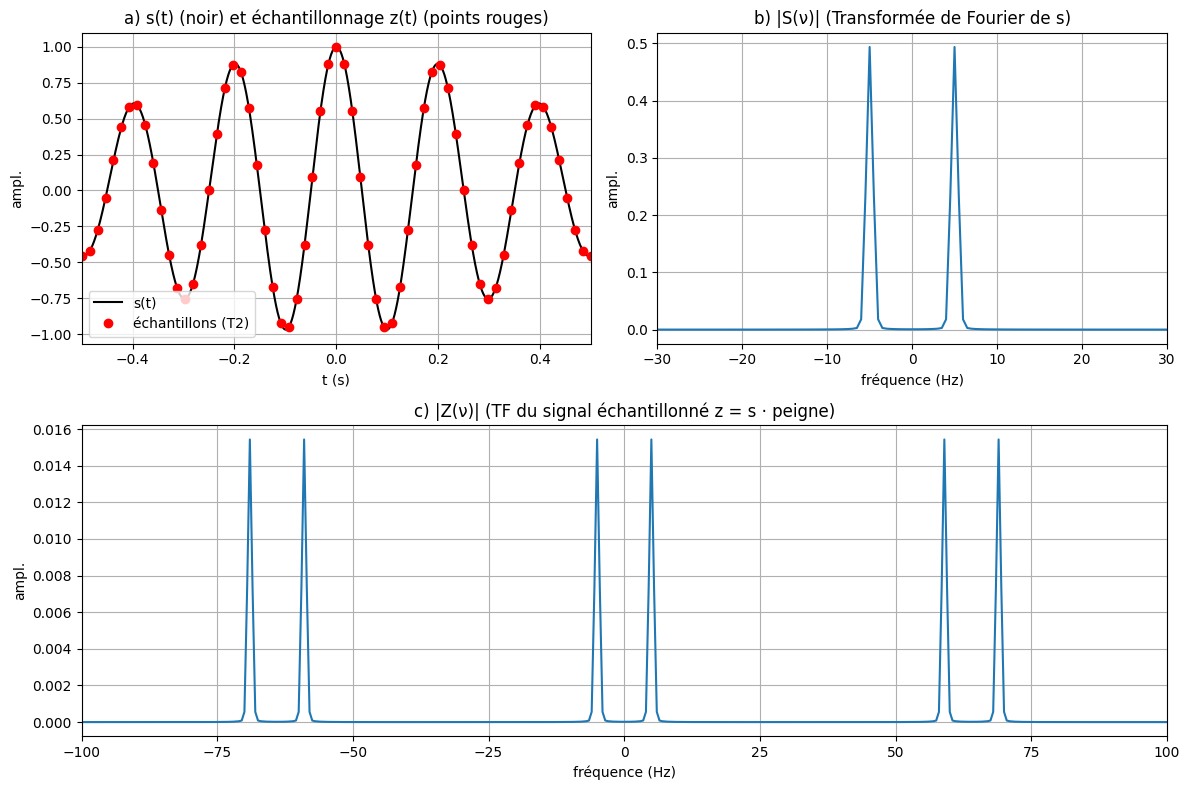

In [ ]:
# ============================================================
# =====================  EXERCICE 7  ==========================
# ============================================================

import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Fonctions complémentaires pour le peigne et la TF manuelle
# ------------------------------------------------------------

def peigne_dirac(t, T, Te):
    """Peigne de Dirac discret de période T."""
    N = len(t)
    comb = np.zeros(N)
    step = int(round(T / Te))
    center = np.argmin(np.abs(t))
    for k in range(center, N, step):
        comb[k] = 1
    for k in range(center, -1, -step):
        comb[k] = 1
    return comb

def TF_manuelle(x, t, nu):
    """Transformée de Fourier calculée manuellement (intégrale trapézoïdale)."""
    tf_r, tf_i = [], []
    for k in range(len(nu)):
        tf_r.append(np.trapz(x * np.cos(2*np.pi*nu[k]*t), t))
        tf_i.append(-np.trapz(x * np.sin(2*np.pi*nu[k]*t), t))
    return np.array(tf_r) + 1j * np.array(tf_i)

def s(t, nu0=5.0):
    """Signal du sujet : s(t) = e^{-πt²} cos(2πν₀t)."""
    return np.exp(-np.pi * t**2) * np.cos(2*np.pi*nu0*t)

# ------------------------------------------------------------
# Paramètres de l'exercice 7
# ------------------------------------------------------------
tmin, tmax = -1.0, 1.0
N = 512
t = np.linspace(tmin, tmax, N)
Te = (tmax - tmin) / N
nu_e = 1 / Te
nu = np.linspace(-nu_e/2, nu_e/2, N)

T1 = 2**(-5)
T2 = 2**(-6)
nu0 = 5.0

# ------------------------------------------------------------
# Partie 1 : Peignes temporels et TF (Figure 16)
# ------------------------------------------------------------
comb1 = peigne_dirac(t, T1, Te)
comb2 = peigne_dirac(t, T2, Te)

C1 = TF_manuelle(comb1, t, nu)
C2 = TF_manuelle(comb2, t, nu)

plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.vlines(t[comb1 > 0.5], 0, 1)
plt.title("Peigne temporel (T₁ = 2⁻⁵)")
plt.xlim(-0.15, 0.15)
plt.xlabel("t (s)"); plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(2,2,2)
plt.vlines(t[comb2 > 0.5], 0, 1)
plt.title("Peigne temporel (T₂ = 2⁻⁶)")
plt.xlim(-0.15, 0.15)
plt.xlabel("t (s)"); plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(nu, np.abs(C1))
plt.title("|C₁(ν)| – TF du peigne T₁")
plt.xlabel("ν (Hz)"); plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(2,2,4)
plt.plot(nu, np.abs(C2))
plt.title("|C₂(ν)| – TF du peigne T₂")
plt.xlabel("ν (Hz)"); plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# Partie 2 : Échantillonnage du signal et spectres (Figure 17)
# ------------------------------------------------------------

s_t = s(t, nu0)
z_t = s_t * comb2                      # échantillonnage par le peigne T₂

S = TF_manuelle(s_t, t, nu)
Z = TF_manuelle(z_t, t, nu)

plt.figure(figsize=(12,8))

# (a) signal et échantillons
plt.subplot(2,2,1)
plt.plot(t, s_t, 'k', label='s(t)')
plt.plot(t[comb2 > 0.5], s_t[comb2 > 0.5], 'ro', label='échantillons')
plt.title("a) s(t) et échantillonnage z(t)")
plt.xlabel("t (s)"); plt.ylabel("Amplitude")
plt.xlim(-0.5, 0.5)
plt.grid(True); plt.legend()

# (b) spectre |S(ν)|
plt.subplot(2,2,2)
plt.plot(nu, np.abs(S))
plt.title("b) |S(ν)| – spectre du signal original")
plt.xlabel("ν (Hz)"); plt.ylabel("Amplitude")
plt.xlim(-30, 30)
plt.grid(True)

# (c) spectre |Z(ν)| périodisé
plt.subplot(2,1,2)
plt.plot(nu, np.abs(Z))
plt.title("c) |Z(ν)| – spectre du signal échantillonné (périodisé)")
plt.xlabel("ν (Hz)"); plt.ylabel("Amplitude")
plt.xlim(-100, 100)
plt.grid(True)

plt.tight_layout()
plt.show()

